Importing Libraries

In [1]:
# Suppress warnings to avoid clutter in the output
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np
from tqdm import tqdm  # Import tqdm for progress bars
import re  # Regular expressions for text processing
import time  # For time-related functions

# Import functions for model evaluation and splitting data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import logistic regression model for classification tasks
from sklearn.linear_model import LogisticRegression

# Import vectorizers for converting text to numerical format
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from wordcloud import WordCloud  # For creating word clouds

# Import NLP libraries
import spacy
import nltk

# Download WordNet and stopwords from NLTK if not already installed
nltk.download('wordnet')
nltk.download('stopwords')

# Load the spaCy English model for natural language processing tasks
nlp = spacy.load('en_core_web_sm')

# Import lemmatizer and stopwords from NLTK
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

# Import TensorFlow and Keras for building deep learning models
import tensorflow as tf
from keras.callbacks import EarlyStopping  # For stopping training early
from tensorflow.keras.optimizers import Adam  # Adam optimizer
from tensorflow.keras.models import Sequential  # Sequential model type
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, SimpleRNN, LSTM, GRU, Bidirectional, BatchNormalization  # Various layers for building neural networks
from tensorflow.keras.preprocessing.text import Tokenizer  # For tokenizing text
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences to a uniform length

# Ensure NLTK data path includes local data if needed
nltk.data.path.append('nltk_data')

# Import WordNet from NLTK for lexical database functions
from nltk.corpus import wordnet


ModuleNotFoundError: No module named 'plotly'

In [2]:
pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.1 MB 2.8 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/19.1 MB 3.4 MB/s eta 0:00:06
   -- ------------------------------------- 1.3/19.1 MB 2.7 MB/s eta 0:00:07
   -- ------------------------------------- 1.3/19.1 MB 2.7 MB/s eta 0:00:07
   --- ------------------------------------ 1.6/19.1 MB 1.7 MB/s eta 0:00:11
   --- ------------------------------------ 1.6/19.1 MB 1.7 MB/s eta 0:00:11
   --- ------------------------------------ 1.8/19.1 MB 1.2 MB/s eta 0:00:15
   --- ------------------------------------ 1.8/19.1 MB 1.2 MB/s eta 0:00:15
   ---- ----------------------------------- 2.4/19.1 MB 1.2 MB/s eta 0:00:14
   ------ --------------------------------- 2.9/19.1 MB 1.3 MB/s eta 0:00:13
   ------ --------------------------------- 3.1/19.1 MB 1.4 MB/s eta 0:00:12
   ------- --

Importing Dataset and Preprocessing

In [2]:
# Load a CSV file containing training data into a Pandas DataFrame
# The file is read with Latin encoding, no header is used, and any bad lines are skipped
data = pd.read_csv(r"training.1600000.processed.noemoticon.csv", encoding='latin', header=None, on_bad_lines='skip')

In [3]:
data

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
#Taking a fraction of the dataset just to reduce training time for this notebook
df=data.sample(frac=1)[:100000]

In [5]:
# Display a random sample of 5 rows from the DataFrame to get a quick overview of the data
df.sample(5)

,0,1,2,3,4,5
149184,0,1883360432,Fri May 22 08:25:43 PDT 2009,NO_QUERY,jessc098,"@jennipps Oh, true, it could be very depressin..."
942199,4,1794542224,Thu May 14 06:02:45 PDT 2009,NO_QUERY,Sleepytot,@dribblebuster spoke to the shop in teddington...
1413476,4,2056857529,Sat Jun 06 11:55:38 PDT 2009,NO_QUERY,chickybarbwire,@noahcyrus8 everybody has to follow this aweso...
13871,0,1553451689,Sat Apr 18 14:18:12 PDT 2009,NO_QUERY,buffyfan1,@nathanfillion She &amp; Morena are in Orlando...
521565,0,2192458361,Tue Jun 16 07:04:06 PDT 2009,NO_QUERY,BiGVixXen,@trixie360 I want my live back


In [6]:
# Select only the first (Sentiment) and sixth (Text) columns from the DataFrame
df = df[[0, 5]]

# Rename the selected columns for better readability
df.rename(columns={0: 'Sentiment', 5: 'Text'}, inplace=True)

# Replace sentiment value '4' with '1' to normalize the sentiment labels (e.g., converting positive sentiment)
df['Sentiment'] = df['Sentiment'].replace(4, 1)

Here are the preprocessing steps that we'll perform:

    Convert the whole text to lowercase so that words are not perceived differently just because they are in different cases.
    Use regex to remove special characters, usernames, and hyperlinks as they are redundant to sentiment ysisnaly
    Remove Stopwords. Stopwords are commonly occurring words such as "the", "a", "in", "You", "I", "could", etc. that don't contribute much.sis.
    Lemmatize the text (bring them to their base form). You can learn more about lemmatiz.much.



In [7]:

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

url_mention_pattern = re.compile(r"(?:\@|https?\://)\S+|[^\w\s#]")

def preprocess_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove URLs, mentions, and non-alphanumeric characters except hashtags
    tweet = url_mention_pattern.sub('', tweet)
    # Tokenize by simple whitespace
    tokens = tweet.split()
    # Lemmatize and filter out stopwords and short tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 1]
    # Join tokens back into a processed tweet
    processed_tweet = ' '.join(lemmatized_tokens)
    return processed_tweet

In [8]:
# Create a new column 'Preprocessed_text' in the DataFrame by applying the 'preprocess_tweet' function to each tweet in the 'Text' column
df['Preprocessed_text'] = [preprocess_tweet(txt) for txt in df['Text']]

In [9]:
# Create a new column 'word_length' that contains the number of words in each preprocessed tweet
df['word_length'] = df['Preprocessed_text'].apply(lambda x: len(x.split(" ")))

# Create a new column 'char_length' that contains the number of characters in each preprocessed tweet
df['char_length'] = df['Preprocessed_text'].apply(lambda x: len(x))

In [10]:
df.head()

,Sentiment,Text,Preprocessed_text,word_length,char_length
1407912,1,@g_lifted you're welcome where u from?,youre welcome,2,13
330303,0,@superhussy what did law &amp; order just do?!...,law amp order didnt watch tonight #missingout,7,45
911109,1,@Aniluck,,1,0
1131017,1,@ReloU its a very rare car (Mustang Mach1) in ...,rare car mustang mach1 look like perfect condi...,14,83
1120613,1,Our boat made it across!!,boat made across,3,16


EDA
Let's perform some basic Exploratory Data Analysis to gain insights about our data

In [11]:
# Count the number of positive sentiments (labeled as '1') in the DataFrame
positive_count = len(df[df['Sentiment'] == 1])

# Count the number of negative sentiments (labeled as '0') in the DataFrame
negative_count = len(df[df['Sentiment'] == 0])

In [12]:
# Create a pie chart to visualize the distribution of sentiments (positive vs. negative)
fig = px.pie(
    values=[positive_count, negative_count],  # Values for the pie chart
    title="Distribution of Sentiments",  # Title of the chart
    names=['Positive', 'Negative'],  # Labels for the slices
    hover_name=['Positive', 'Negative'],  # Names to display on hover
    opacity=0.9,  # Set the opacity of the pie chart
    template="plotly_white"  # Use a white background for the chart
)

# Update layout dimensions for better visibility
fig.update_layout(width=600, height=450)

# Display the pie chart
fig.show()


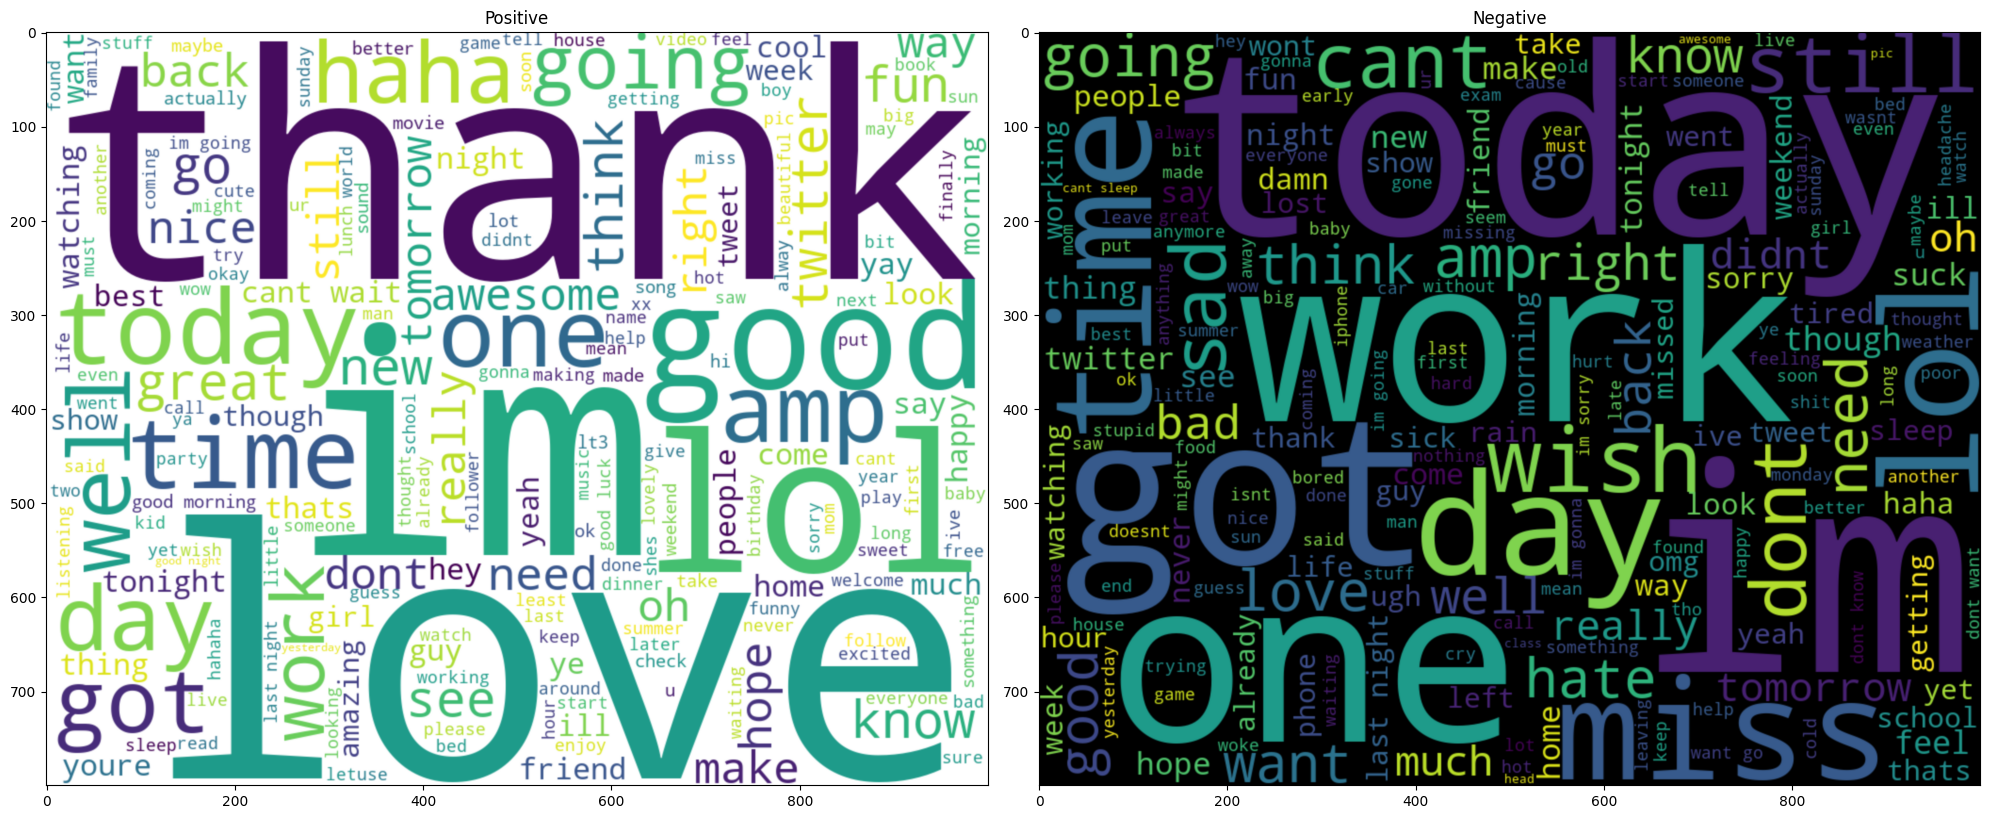

In [13]:
# Set the figure size for the plots
plt.figure(figsize=(20, 8))

# Create the first subplot for the positive sentiment word cloud
plt.subplot(1, 2, 1)
# Generate a word cloud for positive sentiments by joining all preprocessed texts labeled as '1'
wordcloud_1 = WordCloud(height=800, width=1000, background_color='white', random_state=42).generate(' '.join(df[df['Sentiment'] == 1]['Preprocessed_text']))
# Display the word cloud image
plt.imshow(wordcloud_1, interpolation='bicubic')
# Set the title for the positive word cloud
plt.title("Positive")

# Create the second subplot for the negative sentiment word cloud
plt.subplot(1, 2, 2)
# Generate a word cloud for negative sentiments by joining all preprocessed texts labeled as '0'
wordcloud_2 = WordCloud(height=800, width=1000, background_color='black', random_state=42).generate(' '.join(df[df['Sentiment'] == 0]['Preprocessed_text']))
# Display the word cloud image
plt.imshow(wordcloud_2, interpolation='bicubic')
# Set the title for the negative word cloud
plt.title("Negative")

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [14]:
# Create a distribution plot for the word lengths of positive and negative sentiments
fig_words = ff.create_distplot(
    [df[df['Sentiment'] == 1]['word_length'], df[df['Sentiment'] == 0]['word_length']],  # Data for positive and negative sentiments
    ['Positive', 'Negative'],  # Labels for the distributions
    bin_size=25,  # Size of the bins for the histogram
    show_hist=False,  # Do not show the histogram bars
    show_rug=False   # Do not show the rug plot (individual data points)
)

# Update the layout of the plot with titles and dimensions
fig_words.update_layout(
    title="Distribution of Words",  # Title of the plot
    xaxis_title='No. of words',      # Label for the x-axis
    yaxis_title='Frequency',          # Label for the y-axis
    height=500,                      # Height of the plot
    width=700                        # Width of the plot
)

# Display the distribution plot
fig_words.show()


Encoding

Splitting the dataset:

Before encoding,we will split the dataset into training,validation,and testing data. Since our dataset is fairly large,we will use a 90-5-5 split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df['Preprocessed_text'], df['Sentiment'], test_size=0.2, random_state=10)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=10)

# One-Hot Encoding
vec_ohe = CountVectorizer(binary=True)
vec_ohe.fit(df['Preprocessed_text'])
x_train_ohe = vec_ohe.transform(x_train)
x_val_ohe = vec_ohe.transform(x_val)
x_test_ohe = vec_ohe.transform(x_test)

# Count Vectorization
vec_cv = CountVectorizer(binary=False)
vec_cv.fit(df['Preprocessed_text'])
x_train_cv = vec_cv.transform(x_train)
x_val_cv = vec_cv.transform(x_val)
x_test_cv = vec_cv.transform(x_test)

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
tfidf.fit(df['Preprocessed_text'])
x_train_tfidf = tfidf.transform(x_train)
x_val_tfidf = tfidf.transform(x_val)
x_test_tfidf = tfidf.transform(x_test)

# Tokenization and Padding for Sequence Models
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Preprocessed_text'])
word_index = tokenizer.word_index
index_word = tokenizer.index_word

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_val_seq = tokenizer.texts_to_sequences(x_val)
x_test_seq = tokenizer.texts_to_sequences(x_test)
x_train_seq = pad_sequences(x_train_seq, maxlen=20, padding='post')
x_val_seq = pad_sequences(x_val_seq, maxlen=20, padding='post')
x_test_seq = pad_sequences(x_test_seq, maxlen=20, padding='post')

 1. One-Hot Encoding:

    In one-hot encoding, each word in the vocabulary of the dataset is represented as a feature. The presence of a word in a tweet is indicated by a 1, and the absence by a 0


 2. Count Vectorization:

    Similar to one-hot encoding, but instead of indicating the presence of each word with 0s and 1s, we use the frequency (count) of each word in the tweet.

3. TF-IDF Vectorization*:

TF-IDF (Term Frequency-Inverse Document Frequency) is a more advanced form of vectorization. It decreases the importance of a word if it occurs frequently throughout the document corpus, thereby highlighting words that are more significant in specific tweets.

4. Sequence Encoding:

    Sequence encoding involves converting tweets into sequences of integers, where each integer represents a specific word in the vocabulary. This is crucial for models that process text as a sequence of words

 5. Embedding Layer:

    Embedding layers transform sequences of integers into dense vectors of fixed size, based on their semantic meaning. This method captures the context of words within tweets by positioning them in a continuous vector space, which is then fed into the model.​

Modelling

In [16]:
model_performances=pd.DataFrame(columns=["Name","Validation Accuracy","Test Accuracy","Training Time"],data=None)

1. OneHotEncoder + Logistic Regression

In [17]:
initial=time.time()
lr=LogisticRegression()
lr.fit(x_train_ohe,y_train)
training_time=time.time()-initial
preds=lr.predict(x_test_ohe)
score=accuracy_score(y_test,preds)

model_performances=pd.concat([model_performances,pd.DataFrame({
    "Name":["Logistic Regression + OHE"],
    "Validation Accuracy":[score],
    "Test Accuracy":[score],
    "Training Time":[training_time]
})],ignore_index=True)

### 2. OneHotEncoder + MLP

In [18]:
# Initialize a sequential model for a neural network
model = Sequential()

# Add a dense layer with 512 units and ReLU activation; input shape is the number of features from the one-hot encoded training data
model.add(Dense(512, activation='relu', input_shape=(x_train_ohe.shape[1],)))

# Add another dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add a dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model using binary crossentropy loss, Adam optimizer, and accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up early stopping to monitor validation loss and restore best weights after 3 epochs of no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set the number of epochs and batch size for training
epochs = 10
batch_size = 512

# Record the starting time for training
initial = time.time()

# Fit the model on the one-hot encoded training data, using validation data and early stopping
history = model.fit(x_train_ohe, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val_ohe, y_val), callbacks=[early_stopping])

# Calculate the total training time
training_time = time.time() - initial

# Store model performance metrics in a DataFrame for later analysis
model_performances = pd.concat([model_performances, pd.DataFrame({
    "Name": ["CountVectorizer + MLP"],  # Name of the model for reference
    "Validation Accuracy": [max(history.history['val_accuracy'])],  # Best validation accuracy achieved
    "Test Accuracy": [model.evaluate(x_test_ohe, y_test)[1]],  # Test accuracy on the test dataset
    "Training Time": [training_time]  # Total training time taken
})], ignore_index=True)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 523ms/step - accuracy: 0.7064 - loss: 0.5752 - val_accuracy: 0.7634 - val_loss: 0.4927
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 517ms/step - accuracy: 0.8557 - loss: 0.3369 - val_accuracy: 0.7532 - val_loss: 0.5429
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 520ms/step - accuracy: 0.9369 - loss: 0.1628 - val_accuracy: 0.7485 - val_loss: 0.7174
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 525ms/step - accuracy: 0.9778 - loss: 0.0612 - val_accuracy: 0.7420 - val_loss: 0.9891
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7631 - loss: 0.5007


### 2. CountVectorizer + MLP

In [19]:
# Initialize a sequential model for a neural network
# model = Sequential()

# Add a dense layer with 512 units and ReLU activation; input shape is the number of features from the training data
# model.add(Dense(512, activation='relu', input_shape=(x_train_cv.shape[1],)))

# Add another dense layer with 128 units and ReLU activation
# model.add(Dense(128, activation='relu'))

# Add a dense layer with 32 units and ReLU activation
# model.add(Dense(32, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation for binary classification
# model.add(Dense(1, activation='sigmoid'))

# Compile the model using binary crossentropy loss, Adam optimizer, and accuracy as a metric
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up early stopping to monitor validation loss and restore best weights after 3 epochs of no improvement
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set the number of epochs and batch size for training
# epochs = 10
# batch_size = 32

# Record the starting time for training
# initial = time.time()

# Fit the model on the training data, using validation data and early stopping
# history = model.fit(x_train_cv, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val_cv, y_val), callbacks=[early_stopping])

# Calculate the total training time
# training_time = time.time() - initial

# Store model performance metrics in a DataFrame for later analysis
# model_performances = pd.concat([model_performances, pd.DataFrame({
#     "Name": ["CountVectorizer + MLP"],
#     "Validation Accuracy": [max(history.history['val_accuracy'])],
#     "Test Accuracy": [model.evaluate(x_test_cv, y_test)[1]],
#     "Training Time": [training_time]
# })], ignore_index=True)


### 3. Tfidf + MLP

In [20]:
# Initialize a sequential model for a neural network
model = Sequential()

# Add a dense layer with 512 units and ReLU activation; input shape is the number of features from the TF-IDF encoded training data
model.add(Dense(512, activation='relu', input_shape=(x_train_tfidf.shape[1],)))

# Add another dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add a dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Initialize the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.0001)

# Compile the model using binary crossentropy loss, the Adam optimizer, and accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Set up early stopping to monitor validation loss and restore best weights after 3 epochs of no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set the number of epochs and batch size for training
epochs = 10
batch_size = 512

# Record the starting time for training
initial = time.time()

# Fit the model on the TF-IDF encoded training data, using validation data and early stopping
history = model.fit(x_train_tfidf, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val_tfidf, y_val), callbacks=[early_stopping])

# Calculate the total training time
training_time = time.time() - initial

# Store model performance metrics in a DataFrame for later analysis
model_performances = pd.concat([model_performances, pd.DataFrame({
    "Name": ["Tfidf + MLP "],  # Name of the model for reference
    "Validation Accuracy": [max(history.history['val_accuracy'])],  # Best validation accuracy achieved
    "Test Accuracy": [model.evaluate(x_test_tfidf, y_test)[1]],  # Test accuracy on the test dataset
    "Training Time": [training_time]  # Total training time taken
})], ignore_index=True)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 481ms/step - accuracy: 0.6382 - loss: 0.6756 - val_accuracy: 0.7577 - val_loss: 0.5291
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 75s 476ms/step - accuracy: 0.8029 - loss: 0.4621 - val_accuracy: 0.7635 - val_loss: 0.4927
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 471ms/step - accuracy: 0.8519 - loss: 0.3640 - val_accuracy: 0.7607 - val_loss: 0.5151
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 488ms/step - accuracy: 0.8816 - loss: 0.3030 - val_accuracy: 0.7511 - val_loss: 0.5446
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 490ms/step - accuracy: 0.9001 - loss: 0.2576 - val_accuracy: 0.7401 - val_loss: 0.5796
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7672 - loss: 0.4964


### 4. Embedding Layer + MLP

In [21]:
# Initialize a sequential model for a neural network
model = Sequential()

# Add an embedding layer to convert integer-encoded words into dense vectors of fixed size (100)
# 'input_dim' is the size of the vocabulary plus one (for padding), 'input_length' is the length of the input sequences
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=20))

# Flatten the output of the embedding layer to feed into the dense layers
model.add(Flatten())

# Add a dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Add another dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Initialize the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.0001)

# Compile the model using binary crossentropy loss, the Adam optimizer, and accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Set up early stopping to monitor validation loss and restore best weights after 3 epochs of no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set the number of epochs and batch size for training
epochs = 10
batch_size = 512

# Record the starting time for training
initial = time.time()

# Fit the model on the sequence training data, using validation data and early stopping
history = model.fit(x_train_seq, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val_seq, y_val), callbacks=[early_stopping])

# Calculate the total training time
training_time = time.time() - initial

# Store model performance metrics in a DataFrame for later analysis
model_performances = pd.concat([model_performances, pd.DataFrame({
    "Name": ["Embedding Layer + MLP"],  # Name of the model for reference
    "Validation Accuracy": [max(history.history['val_accuracy'])],  # Best validation accuracy achieved
    "Test Accuracy": [model.evaluate(x_test_seq, y_test)[1]],  # Test accuracy on the test dataset
    "Training Time": [training_time]  # Total training time taken
})], ignore_index=True)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.5238 - loss: 0.6911 - val_accuracy: 0.6257 - val_loss: 0.6687
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.6862 - loss: 0.6317 - val_accuracy: 0.7203 - val_loss: 0.5498
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.7706 - loss: 0.4998 - val_accuracy: 0.7513 - val_loss: 0.5142
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.8040 - loss: 0.4405 - val_accuracy: 0.7603 - val_loss: 0.5082
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.8340 - loss: 0.3931 - val_accuracy: 0.7557 - val_loss: 0.5128
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.8602 - loss: 0.3459 - val_accuracy: 0.7506 - val_loss: 0.5306
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.8829 - loss: 0.3043 - val_accuracy: 0.7452 - val_loss: 0.5513
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7585 - loss: 0.5157


### 5. Embedding Layer+ RNN

In [22]:
# Initialize a sequential model for a neural network
model = Sequential()

# Add an embedding layer to convert integer-encoded words into dense vectors of fixed size (100)
# 'input_dim' is the size of the vocabulary plus one (for padding), 'input_length' is the length of the input sequences
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=20))

# Add a Simple RNN layer with 100 units and a dropout rate of 0.2; return sequences to pass to the next RNN layer
model.add(SimpleRNN(units=100, dropout=0.2, return_sequences=True))

# Add another Simple RNN layer with 50 units; this layer does not return sequences
model.add(SimpleRNN(units=50))

# Add a dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Add a dropout layer with a rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model using binary crossentropy loss, Adam optimizer, and accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up early stopping to monitor validation loss and restore best weights after 3 epochs of no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set the number of epochs and batch size for training
epochs = 10
batch_size = 512

# Record the starting time for training
initial = time.time()

# Fit the model on the sequence training data, using validation data and early stopping
history = model.fit(x_train_seq, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val_seq, y_val), callbacks=[early_stopping])

# Calculate the total training time
training_time = time.time() - initial

# Store model performance metrics in a DataFrame for later analysis
model_performances = pd.concat([model_performances, pd.DataFrame({
    "Name": ["Embedding Layer + RNN"],  # Name of the model for reference
    "Validation Accuracy": [max(history.history['val_accuracy'])],  # Best validation accuracy achieved
    "Test Accuracy": [model.evaluate(x_test_seq, y_test)[1]],  # Test accuracy on the test dataset
    "Training Time": [training_time]  # Total training time taken
})], ignore_index=True)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.6068 - loss: 0.6448 - val_accuracy: 0.7489 - val_loss: 0.5166
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.8086 - loss: 0.4444 - val_accuracy: 0.7492 - val_loss: 0.5214
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.8701 - loss: 0.3250 - val_accuracy: 0.7288 - val_loss: 0.5826
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.9105 - loss: 0.2370 - val_accuracy: 0.7291 - val_loss: 0.6748
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7562 - loss: 0.5203


### 6. Embedding Layer+ LSTM

In [23]:
# Initialize a sequential model for a neural network
model = Sequential()

# Add an embedding layer to convert integer-encoded words into dense vectors of fixed size (100)
# 'input_dim' is the size of the vocabulary plus one (for padding), 'input_length' is the length of the input sequences
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=20))

# Add an LSTM layer with 100 units and a dropout rate of 0.2; return sequences to pass to the next LSTM layer
model.add(LSTM(units=100, dropout=0.2, return_sequences=True))

# Add another LSTM layer with 50 units; this layer does not return sequences
model.add(LSTM(units=50))

# Add a dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Add a dropout layer with a rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model using binary crossentropy loss, Adam optimizer, and accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up early stopping to monitor validation loss and restore best weights after 3 epochs of no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set the number of epochs and batch size for training
epochs = 10
batch_size = 512

# Record the starting time for training
initial = time.time()

# Fit the model on the sequence training data, using validation data and early stopping
history = model.fit(x_train_seq, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val_seq, y_val), callbacks=[early_stopping])

# Calculate the total training time
training_time = time.time() - initial

# Store model performance metrics in a DataFrame for later analysis
model_performances = pd.concat([model_performances, pd.DataFrame({
    "Name": ["Embedding Layer + LSTM"],  # Name of the model for reference
    "Validation Accuracy": [max(history.history['val_accuracy'])],  # Best validation accuracy achieved
    "Test Accuracy": [model.evaluate(x_test_seq, y_test)[1]],  # Test accuracy on the test dataset
    "Training Time": [training_time]  # Total training time taken
})], ignore_index=True)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 156ms/step - accuracy: 0.6111 - loss: 0.6310 - val_accuracy: 0.7587 - val_loss: 0.5009
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 156ms/step - accuracy: 0.8082 - loss: 0.4404 - val_accuracy: 0.7482 - val_loss: 0.5187
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 154ms/step - accuracy: 0.8440 - loss: 0.3725 - val_accuracy: 0.7372 - val_loss: 0.5313
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.8693 - loss: 0.3179 - val_accuracy: 0.7324 - val_loss: 0.6042
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7578 - loss: 0.5044


### 7. Embedding+GRU

In [25]:
# Initialize a sequential model for a neural network
model = Sequential()

# Add an embedding layer to convert integer-encoded words into dense vectors of fixed size (100)
# 'input_dim' is the size of the vocabulary plus one (for padding), 'input_length' is the length of the input sequences
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=20))

# Add a GRU layer with 100 units and a dropout rate of 0.2; return sequences to pass to the next GRU layer
model.add(GRU(units=100, dropout=0.2, return_sequences=True))

# Add another GRU layer with 50 units; this layer does not return sequences
model.add(GRU(units=50))

# Add a dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Add a dropout layer with a rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model using binary crossentropy loss, Adam optimizer, and accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up early stopping to monitor validation loss and restore best weights after 3 epochs of no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set the number of epochs and batch size for training
epochs = 10
batch_size = 512

# Record the starting time for training
initial = time.time()

# Fit the model on the sequence training data, using validation data and early stopping
history = model.fit(x_train_seq, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val_seq, y_val), callbacks=[early_stopping])

# Calculate the total training time
training_time = time.time() - initial

# Store model performance metrics in a DataFrame for later analysis
model_performances = pd.concat([model_performances, pd.DataFrame({
    "Name": ["Embedding + GRU"],  # Name of the model for reference
    "Validation Accuracy": [max(history.history['val_accuracy'])],  # Best validation accuracy achieved
    "Test Accuracy": [model.evaluate(x_test_seq, y_test)[1]],  # Test accuracy on the test dataset
    "Training Time": [training_time]  # Total training time taken
})], ignore_index=True)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 155ms/step - accuracy: 0.5148 - loss: 0.6872 - val_accuracy: 0.7335 - val_loss: 0.5364
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 150ms/step - accuracy: 0.7743 - loss: 0.4865 - val_accuracy: 0.7636 - val_loss: 0.4914
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 149ms/step - accuracy: 0.8312 - loss: 0.4015 - val_accuracy: 0.7572 - val_loss: 0.5110
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 151ms/step - accuracy: 0.8652 - loss: 0.3340 - val_accuracy: 0.7485 - val_loss: 0.5587
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 152ms/step - accuracy: 0.8889 - loss: 0.2832 - val_accuracy: 0.7429 - val_loss: 0.6115
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7682 - loss: 0.4891


### 8. Embedding+Birdirectional+GRU

In [26]:
# Initialize a sequential model for a neural network
model = Sequential()

# Add an embedding layer to convert integer-encoded words into dense vectors of fixed size (100)
# 'input_dim' is the size of the vocabulary plus one (for padding), 'input_length' is the length of the input sequences
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=20))

# Add a Bidirectional GRU layer with 100 units and a dropout rate of 0.2; return sequences for the next layer
model.add(Bidirectional(GRU(units=100, dropout=0.2, return_sequences=True)))

# Add a batch normalization layer to normalize the output of the previous layer
model.add(BatchNormalization())

# Add another Bidirectional GRU layer with 50 units; this layer does not return sequences
model.add(Bidirectional(GRU(units=50)))

# Add a dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Add a dropout layer with a rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Initialize the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.0001)

# Compile the model using binary crossentropy loss, the Adam optimizer, and accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Set up early stopping to monitor validation loss and restore best weights after 5 epochs of no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Set the number of epochs and batch size for training
epochs = 10
batch_size = 512

# Record the starting time for training
initial = time.time()

# Fit the model on the sequence training data, using validation data and early stopping
history = model.fit(x_train_seq, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val_seq, y_val), callbacks=[early_stopping])

# Calculate the total training time
training_time = time.time() - initial

# Store model performance metrics in a DataFrame for later analysis
model_performances = pd.concat([model_performances, pd.DataFrame({
    "Name": ["Embedding + Bidirectional GRU"],  # Name of the model for reference
    "Validation Accuracy": [max(history.history['val_accuracy'])],  # Best validation accuracy achieved
    "Test Accuracy": [model.evaluate(x_test_seq, y_test)[1]],  # Test accuracy on the test dataset
    "Training Time": [training_time]  # Total training time taken
})], ignore_index=True)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 245ms/step - accuracy: 0.5162 - loss: 0.6955 - val_accuracy: 0.6525 - val_loss: 0.6852
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 238ms/step - accuracy: 0.6677 - loss: 0.6106 - val_accuracy: 0.7218 - val_loss: 0.6267
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 238ms/step - accuracy: 0.7647 - loss: 0.5058 - val_accuracy: 0.7456 - val_loss: 0.5474
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 238ms/step - accuracy: 0.8070 - loss: 0.4453 - val_accuracy: 0.7578 - val_loss: 0.5025
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 238ms/step - accuracy: 0.8323 - loss: 0.4022 - val_accuracy: 0.7573 - val_loss: 0.5104
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 238ms/step - accuracy: 0.8517 - loss: 0.3670 - val_accuracy: 0.7544 - val_loss: 0.5303
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 240ms/step - accuracy: 0.8639 - loss: 0.3405 - val_accuracy: 0.7526 - val_loss: 0.5502
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 239ms/step - accuracy: 0.8753 - loss: 0

##### Overview

In [27]:
model_performances

,Name,Validation Accuracy,Test Accuracy,Training Time
0,Logistic Regression + OHE,0.7632,0.7632,1.400751
1,CountVectorizer + MLP,0.7634,0.7660,329.907802
2,Tfidf + MLP,0.7635,0.7673,379.380024
3,Embedding Layer + MLP,0.7603,0.7564,56.918859
4,Embedding Layer + RNN,0.7492,0.7559,52.106676
5,Embedding Layer + LSTM,0.7587,0.7594,101.658710
6,Embedding + GRU,0.7636,0.7667,124.233836
7,Embedding + Bidirectional GRU,0.7578,0.7607,347.393812


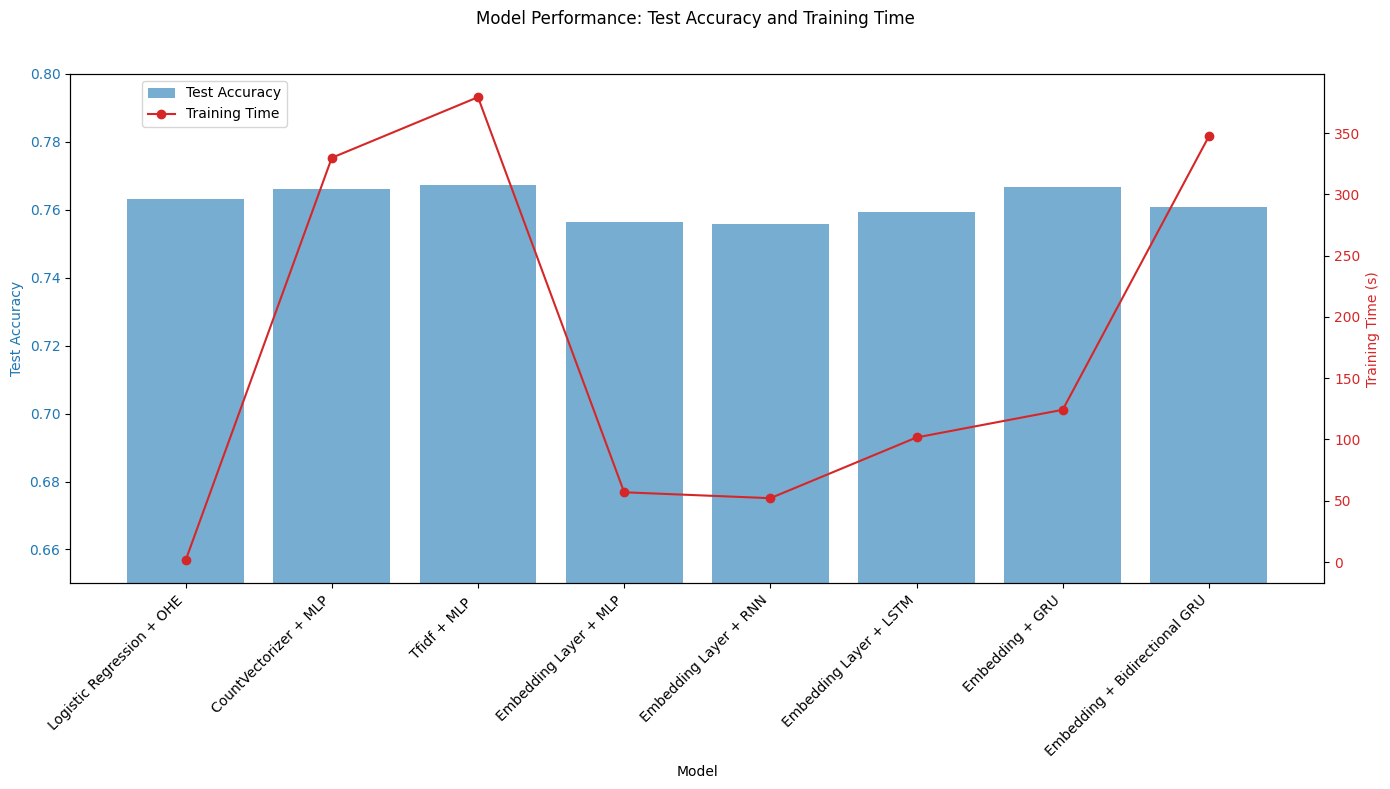

In [28]:
# Create a figure and a set of subplots with specified size
fig, ax1 = plt.subplots(figsize=(14, 8))

# Set the color for the first axis
color = 'tab:blue'
ax1.set_xlabel('Model')  # Label for the x-axis
ax1.set_ylabel('Test Accuracy', color=color)  # Label for the y-axis (Test Accuracy)
# Create a bar plot for Test Accuracy using the model performances
ax1.bar(model_performances['Name'], model_performances['Test Accuracy'], color=color, alpha=0.6, label='Test Accuracy')
ax1.tick_params(axis='y', labelcolor=color)  # Color the y-axis labels
ax1.set_xticklabels(model_performances['Name'], rotation=45, ha='right')  # Rotate x-axis labels for better visibility
ax1.set_ylim(0.65, 0.8)  # Set the limits for the y-axis to focus on the accuracy range

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Training Time (s)', color=color)  # Label for the second y-axis (Training Time)
# Create a line plot for Training Time
ax2.plot(model_performances['Name'], model_performances['Training Time'], color=color, marker='o', label='Training Time')
ax2.tick_params(axis='y', labelcolor=color)  # Color the second y-axis labels

# Set the title for the figure
fig.suptitle('Model Performance: Test Accuracy and Training Time')
fig.tight_layout()  # Automatically adjust subplot parameters for better spacing
fig.subplots_adjust(top=0.9)  # Adjust the top of the subplot to make room for the title

# Create a legend for the figure
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()